<a href="https://colab.research.google.com/github/sonetemon/Computer-Vision/blob/main/problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2



(-0.5, 511.5, 255.5, -0.5)

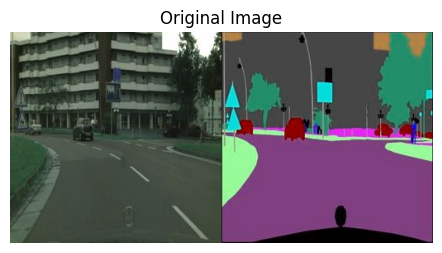

In [8]:
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('/content/1.jpg')
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

(-0.5, 511.5, 255.5, -0.5)

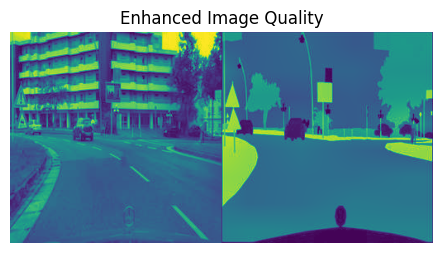

In [12]:
# Convert image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(image_gray)
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.imshow(enhanced)
plt.title('Enhanced Image Quality')
plt.axis('off')

(256, 512, 3)
0 255 0 255


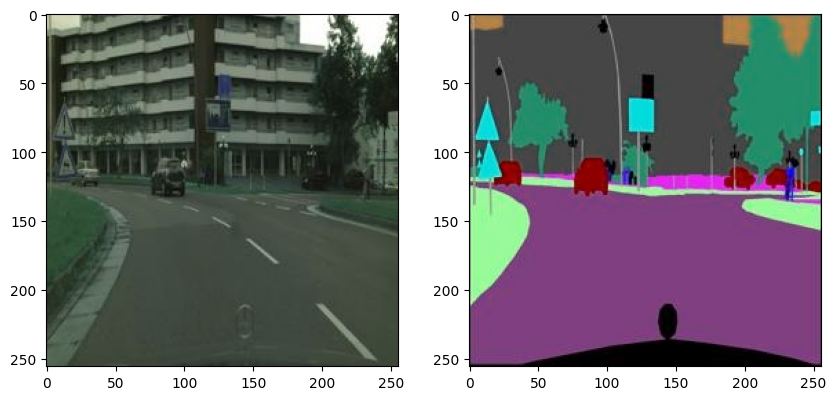

In [13]:
from PIL import Image
def split_image(image):
    image = np.array(image)
    cityscape, label = image[:, :256, :], image[:, 256:, :]
    return cityscape, label


sample_image = np.array(image)
print(image.shape)
cityscape, label = split_image(image)
print(cityscape.min(), cityscape.max(), label.min(), label.max())
cityscape, label = Image.fromarray(cityscape), Image.fromarray(label)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cityscape)
axes[1].imshow(label)

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>


(-0.5, 255.5, 255.5, -0.5)

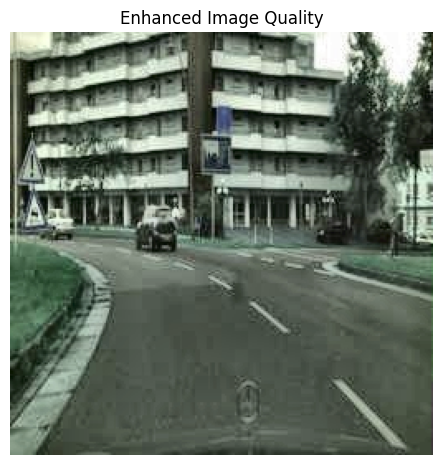

In [24]:
# Convert to LAB color space
print(type(cityscape))
print(type(image))
cityscape = np.array(cityscape)
lab = cv2.cvtColor(cityscape, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
# Apply CLAHE to the L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
limg = cv2.merge((cl, a, b))
# Convert back to BGR
enhanced_image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.imshow(enhanced_image)
plt.title('Enhanced Image Quality')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

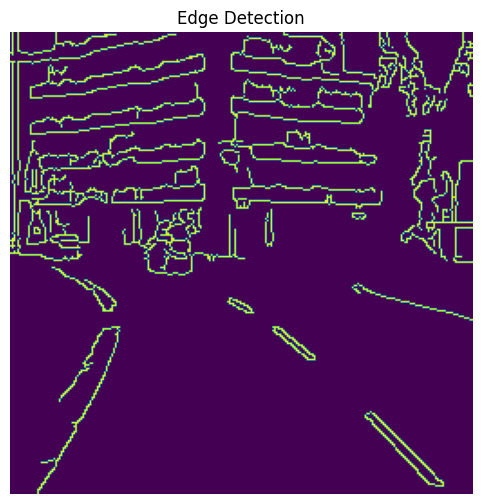

In [27]:
#Detect Edges of Vehicles and Road Markings

gray_image = cv2.cvtColor(cityscape, cv2.COLOR_BGR2GRAY)
# Use Gaussian blur to reduce noise before edge detection
gaus_blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
# Apply Canny Edge Detection
edges = cv2.Canny(gaus_blurred, 50, 150)

plt.figure(figsize=[12,6])
#plt.subplot(1,1,1)
plt.imshow(edges)
plt.title('Edge Detection')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

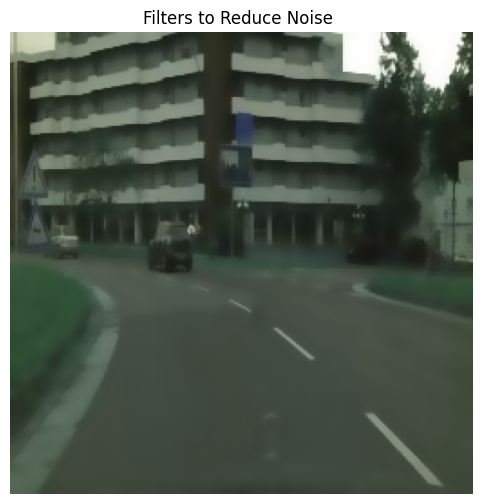

In [30]:
#Apply Filters to Reduce Noise
denoised_cityscape = cv2.bilateralFilter(cityscape, 9, 75, 75)
plt.figure(figsize=[12,6])
#plt.subplot(1,1,1)
plt.imshow(denoised_cityscape)
plt.title('Filters to Reduce Noise ')
plt.axis('off')